In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
m = np.loadtxt('XYmagnetization09.txt', usecols=(0), unpack=True)

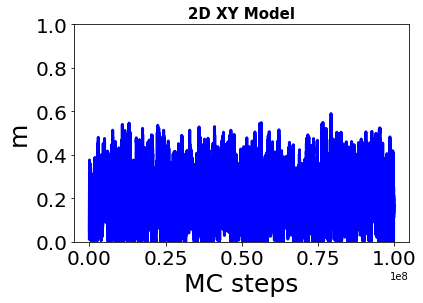

In [3]:
plt.plot(m, lw=3, color='blue')
#plt.xlim(0,1000)
plt.ylim(0,1)
plt.xlabel('MC steps', fontsize='25')
plt.ylabel('m', fontsize='25')
plt.tick_params(labelsize=20)
plt.title('2D XY Model', fontsize= 15, fontweight='bold')
#plt.legend(loc='upper right', prop={'size': 20})
plt.show()

In [17]:
N = 28
M = N*N

In [6]:
print(m)

[0.02132626 0.02140461 0.02133462 ... 0.017406   0.01747768 0.01750531]


In [5]:
print(len(m))

100000000


100
100


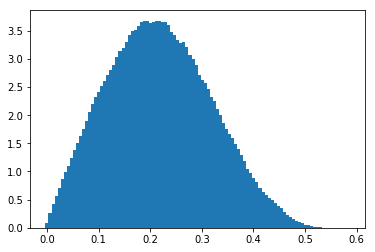

In [6]:
k = 100
n, bins, patches = plt.hist(m, bins=k, align='left', density=True)
t = np.arange(bins[0], bins[k], (bins[k]-bins[0])/k)
print(len(t))
print(len(n))
#plt.clf()

In [12]:
UPro = []
for i in range(k-1): # Unnormalized Probability distribution array has size k-1
    temp = (1/ (2*np.pi*m[i]) ) * n[i]
    UPro.append(temp)

mprime = m[:-1]

In [7]:
s = 0
for i in range(len(n)):
   s += n[i] * ((bins[i] + bins[i+1]) / 2) 
f = s / np.sum(n)
print('The first moment is', f)

e = 0
for i in range(len(n)):
   e += n[i] * ((bins[i] + bins[i+1]) / 2)*((bins[i] + bins[i+1]) / 2)
secmom = e / np.sum(n)
print('The second moment is', secmom)

chi = M*secmom
print('Chi is', chi)

The first moment is 0.2208051837520747
The second moment is 0.05878025540288015
Chi is 46.08372023585804


In [8]:
def clt(t):
    return (2/(chi/M))*t*np.exp((-1/(chi/M))*(t**2))

def CltDensity(x):
    return (2/(chi/M))*x*np.exp((-1/(chi/M))*(x**2))

def CltProb(x):
    return (M/(np.pi*chi))*np.exp((-M/chi)*(x**2))  # Normalized probability distribution of Q vector

def UnNormRate(x):
    return (x*x)/chi

def NormRate(x):
    return (-1/M)*np.log(CltProb(x))

In [28]:
corr = 1/2
C = (M/4)*(2/chi - 1 - corr)
#be = 0.802
be = 2.642 # for bJ=0.9
#be = 3.424 for bJ=0.01

def ldt(t):
    return t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))
r = integrate.quad(lambda x: ldt(x), 0, 1, full_output=1)[0]
def normldt(t):
    return (1/r)*t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))

def UnPadeProb(x):
    return ((1-x**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(x**2))*np.exp(C*(x**4))*np.exp((M/4)*be*(x**4))

def UnPadeDen(x):
    return 2*np.pi*x*UnPadeProb(x)

r2 = integrate.quad(lambda x: UnPadeDen(x), 0, 1, full_output=1)[0]

def NormProb(x):
    return (1/r2)*UnPadeProb(x)

def paderate(x):
    return (-1/M)*np.log(NormProb(x))

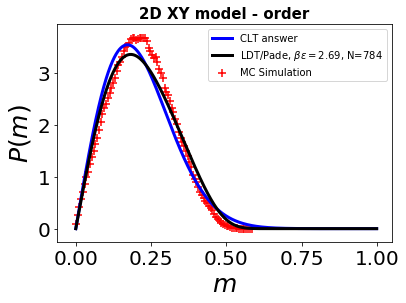

In [29]:
z = np.arange(0,1,0.001)
plt.plot(z, clt(z), color='blue', lw=3, label='CLT answer')
plt.plot(z, normldt(z), color='black',lw=3, label=r'LDT/Pade, $\beta \epsilon=2.69$, N=784')

plt.scatter(t, n, color='red', s=50, marker='+', label='MC Simulation')
plt.xlabel(r'$m$', fontsize='25')
plt.ylabel(r'$P(m)$', fontsize='25')
#plt.xlim(0, 0.13)
#plt.ylim(0,5)
plt.tick_params(labelsize=20)
plt.title('2D XY model - order', fontsize= 15, fontweight='bold')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

In [30]:
def cltrate(t):
    return -(1/M)*np.log(clt(t))

In [31]:
simrate = -(1/M)*np.log(n)

In [32]:
def ldtrate(t):
    return (-1/M)*np.log(normldt(t))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


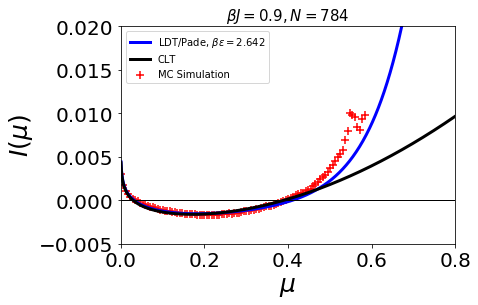

In [36]:
plt.plot(z, ldtrate(z), color='blue',lw=3, label=r'LDT/Pade, $\beta \epsilon = 2.642$')
plt.plot(z, cltrate(z), color='black', lw=3, label='CLT')
plt.scatter(t, simrate, label='MC Simulation', color='red', s=50, marker='+')


mu = np.arange(0,1,0.1)
plt.plot(mu, 0*mu, color='black', lw=1)

plt.xlim(0,0.8)
plt.ylim(-0.005,0.02)
plt.xlabel(r'$\mu$', fontsize='25')
plt.ylabel(r'$I(\mu)$', fontsize='25')
plt.tick_params(labelsize=20)
plt.title(r'$\beta J=0.9, N=784$', fontsize= 15, fontweight='bold')
plt.legend(loc='upper left', prop={'size': 10})
plt.savefig('/Users/κωτς/Desktop/image6.pdf', transparent=True, bbox_inches='tight')

In [27]:
root = []
axis = []

for a in range(2190, 3192, 1):

    be = a/1000
    
    axis.append(be)
    C = (M/4)*(2/chi - 1 - corr)

    def ldt(t):
        return t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))
    r = integrate.quad(lambda x: ldt(x), 0, 1, full_output=1)[0]
    def normldt(t):
        return (1/r)*t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))

    def normqtimespq(t):
        return (1/r)*(t*t)*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4)) 

    av = integrate.quad(lambda x: normqtimespq(x), 0, 1, full_output=1)[0]
    diff = abs(av-f)
    root.append(diff)
    print('be:', be, '<Q>_num:', int, '<Q>_sim-<Q>_num:', diff)

be: 2.19 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.0450097614219353
be: 2.191 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04495482264523648
be: 2.192 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.044899785651354024
be: 2.193 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.044844650121980606
be: 2.194 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.0447894157373456
be: 2.195 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.044734082176206336
be: 2.196 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.044678649115839575
be: 2.197 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04462311623203269
be: 2.198 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04456748319907505
be: 2.199 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04451174968974922
be: 2.2 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.0444559153753217
be: 2.201 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04439997992553468
be: 2.202 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04434394300859648
be: 2.203 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.04428780429117274
be: 2.204 <Q>_num: <cl

be: 2.317 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.03712292176821391
be: 2.318 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.03705236793916136
be: 2.319 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.03698166012975257
be: 2.32 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.03691079774079531
be: 2.321 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036839780169842934
be: 2.322 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036768606811172166
be: 2.323 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036697277055760646
be: 2.324 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036625790291264615
be: 2.325 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036554142823751024
be: 2.326 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036482343268900236
be: 2.327 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036410381769531514
be: 2.328 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036338260778031484
be: 2.329 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.03626597966510456
be: 2.33 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.036193537797994946
be: 2.331 <Q>

be: 2.511 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01958446606709907
be: 2.512 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01946711832615247
be: 2.513 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01934939765739163
be: 2.514 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.019231302058319216
be: 2.515 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.019112829512150403
be: 2.516 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01899397798769084
be: 2.517 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.018874745439214774
be: 2.518 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.018755129806340115
be: 2.519 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.018635129013903934
be: 2.52 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01851474097183653
be: 2.521 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01839396357503273
be: 2.522 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01827279470322407
be: 2.523 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.018151232220848856
be: 2.524 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.018029273976920862
be: 2.525 <Q>_

be: 2.684 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.008676791068750439
be: 2.685 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.008906826129397583
be: 2.686 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.00913795518694066
be: 2.687 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.009370186033254874
be: 2.688 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.009603526525542083
be: 2.689 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.009837984586873239
be: 2.69 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.01007356820673691
be: 2.691 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.010310285441587769
be: 2.692 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.010548144415399724
be: 2.693 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.010787153320220316
be: 2.694 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.011027320416730185
be: 2.695 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.011268654034802733
be: 2.696 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.011511162574069006
be: 2.697 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.011754854504481577
be: 2.698

be: 2.846 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.06791751310804112
be: 2.847 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.06848633960584583
be: 2.848 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.06905869197192432
be: 2.849 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.06963459202131073
be: 2.85 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.0702140615640815
be: 2.851 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07079712240069252
be: 2.852 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.0713837963171895
be: 2.853 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.071974105080294
be: 2.854 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07256807043235414
be: 2.855 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07316571408616862
be: 2.856 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07376705771967584
be: 2.857 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07437212297050944
be: 2.858 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07498093143041262
be: 2.859 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.07559350463952191
be: 2.86 <Q>_num: <class 

be: 3.046 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.2586307154225766
be: 3.047 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.25977915068337853
be: 3.048 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.26092498021586874
be: 3.049 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.26206812220361453
be: 3.05 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.26320849567966187
be: 3.051 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.26434602055893053
be: 3.052 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.2654806176699986
be: 3.053 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.2666122087862589
be: 3.054 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.26774071665641297
be: 3.055 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.2688660650342799
be: 3.056 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.26998817870788283
be: 3.057 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.27110698352781304
be: 3.058 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.27222240643481366
be: 3.059 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 0.27333437548659467
be: 3.06 <Q>_num: <class 